In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

# MY APPROACH

In [2]:
path = "spheres.png"

Load the input image (whose path was supplied via command line argument) and display the image to our screen

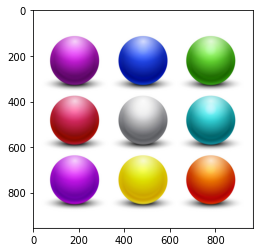

In [3]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

Convert the image to grayscale

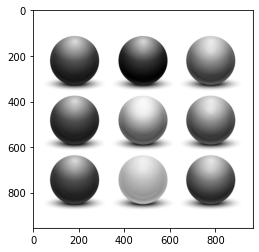

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

Applying edge detection we can find the outlines of objects in images


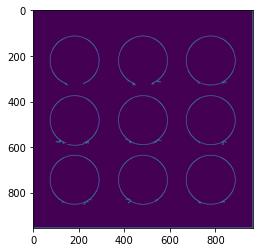

In [27]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

Threshold the image by setting all pixel values less than 225 to 255(white; foreground) and all pixel values >= 225 to 255 (black; background), thereby segmenting the image.

This can be tweeked so say all pixel values less than 128.

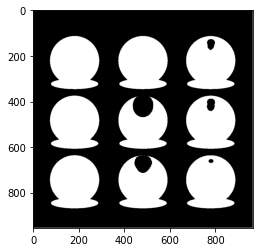

In [19]:
threshold = 225
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image

In [20]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

Loop over the contours

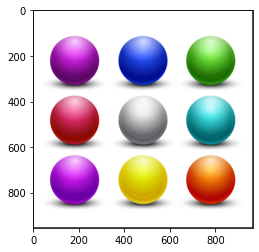

In [21]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)

Draw the total number of contours found in purple

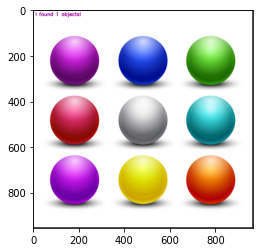

In [9]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects

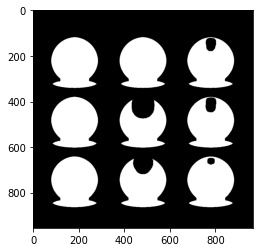

In [10]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects

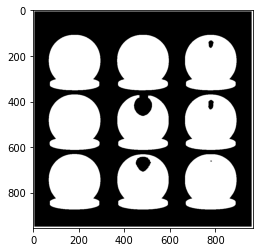

In [11]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise AND to our input image, keeping only the masked regions

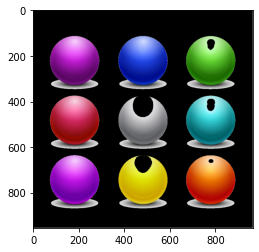

In [12]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# Ex 1
    A) Can you remove the yellow square from the image?
    B) Go through the tutorial but with the "spheres.png" image. (replace tetris_blocks with spheres.png)
    C) Tweak the parameters of the thresholding can you threshold all the spheres?
    D) Can you remove the red sphere?
    C) Can you remove the green?

In [13]:
# image2 = cv2.imread('tetris_blocks.png')
# result = image2.copy()
# gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# thresh = cv2.adaptiveThreshold(
#     gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51, 9)

# # Fill rectangular contours
# cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     cv2.drawContours(thresh, [c], -1, (255, 255, 255), -1)


# HENRIK

In [ ]:
path = "spheres.png"

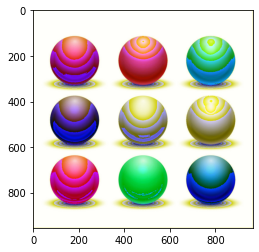

In [ ]:
bgr_img = cv2.imread(path)
(h, s, v) = cv2.split(bgr_img)


h = h * 1
h = np.clip(h,0,255)

s = s * 1
s = np.clip(s,0,255)

v = v * 5
v = np.clip(v,0,255)

imghsv = cv2.merge([h,s,v])
plt.imshow(imghsv)

Load the input image (whose path was supplied via command line argument) and display the image to our screen

width=965, height=955, depth=3


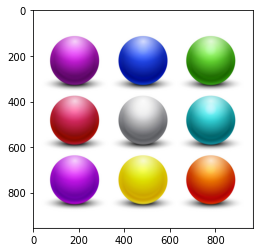

In [ ]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))

plt.imshow(image)


Convert the image to grayscale

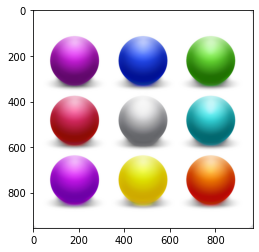

In [ ]:
kernel = (55,55)

#blurred = cv2.GaussianBlur(image, kernel, 0)
blurred = cv2.medianBlur(image, 33)
plt.imshow(blurred)

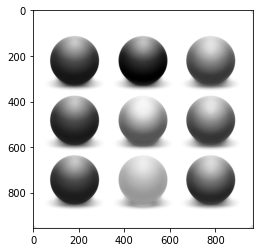

In [ ]:
gray = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

Applying edge detection we can find the outlines of objects in images


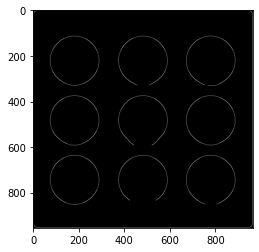

In [ ]:
edged = cv2.Canny(gray, 30, 155)
plt.imshow(edged, cmap='gray')

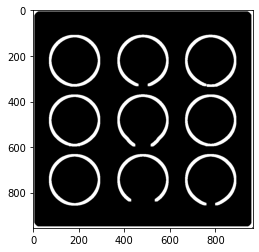

In [ ]:
mask = edged.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

Threshold the image by setting all pixel values less than 225 to 255(white; foreground) and all pixel values >= 225 to 0 (black; background), thereby segmenting the image.

This can be tweeked so say all pixel values less than 128.

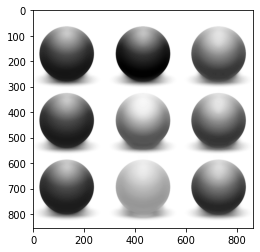

In [ ]:
roi = gray[50:-50, 50:-50]
plt.imshow(roi, cmap="gray")

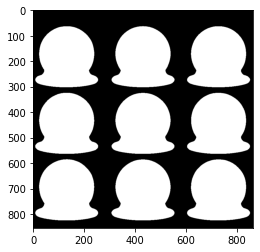

In [ ]:
threshold = 250
threshold_value = 255

thresh = cv2.threshold(roi.copy(), threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

In [ ]:
#mask = thresh.copy()
#mask = cv2.erode(mask, None, iterations = 8)
#plt.imshow(mask, cmap = 'gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image

In [ ]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

Loop over the contours

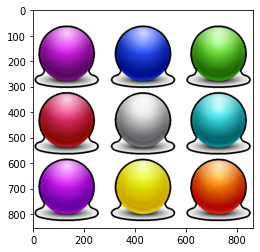

In [ ]:
output = image[50:-50, 50:-50].copy()
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 5)
    
plt.imshow(output)

Draw the total number of contours found in purple

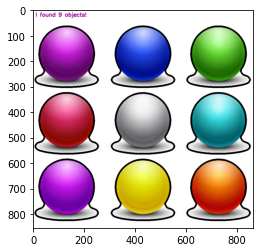

In [ ]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects

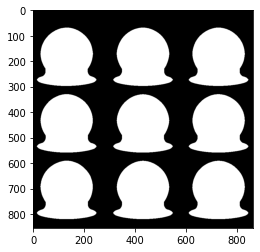

In [ ]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects

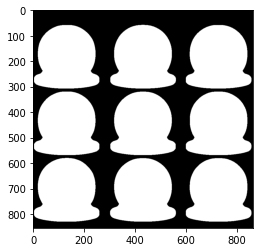

In [ ]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise AND to our input image, keeping only the masked regions

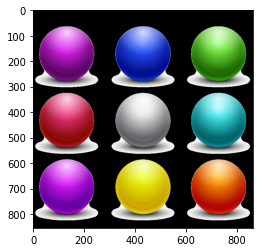

In [ ]:
mask = thresh.copy()
output = cv2.bitwise_and(image[50:-50, 50:-50], image[50:-50, 50:-50], mask=mask)
plt.imshow(output)

# Ex 2
    A) Can you remove the yellow square from the image?
    B) Go through the tutorial but with the "spheres.png" image. (replace tetris_blocks with spheres.png)
    C) Tweak the parameters of the thresholding can you threshold all the spheres?
    D) Can you remove the red sphere?
    C) Can you remove the green?

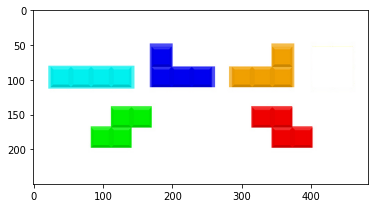

In [ ]:
### A Remove the yellow square
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

cv2.fillPoly(output, pts =[cnts[3]], color=(255,255,255))
plt.imshow(output)

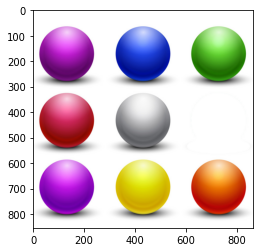

In [ ]:
### D
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image[50:-50, 50:-50].copy()

cv2.fillPoly(output, pts =[cnts[3]], color=(255,255,255))
plt.imshow(output)


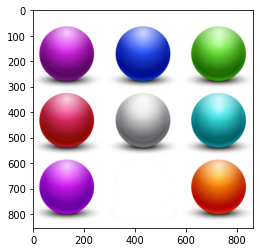

In [ ]:
### E
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image[50:-50, 50:-50].copy()

cv2.fillPoly(output, pts =[cnts[1]], color=(255,255,255))
plt.imshow(output)